In [1]:
# general immports may go here!
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from typing import List, Optional, Tuple, Dict
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In /Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/sunwen/opt/anaconda3/lib/pytho

### Task 1:  Simulating the SIS-Model on Random Graphs (25 pts)

In [2]:
def initialize_graph(G, attr="state"):
    """
    :param G: networkx graph
    :param attr: string specifying the node attribute 
    :
    :return: resulting networkx graph
    """
    # reducing the network to its biggest component
    Gc = sorted(nx.connected_components(G), key = len, reverse=True)
    H =  G.subgraph(Gc[0])
    intialization={node: 0 for node in G.nodes()} #susceptible
    nx.set_node_attributes(H,intialization,attr)
    patient_zero=random.choice(list(H.nodes())) #randomly select a node
    H.nodes[patient_zero][attr]=1 #change its state to 1 - infected
    return H

In [3]:
def change_infected_into_recover(G,node_states,attr,attr2):
    node_recover = nx.get_node_attributes(G,attr2)
    for x in G.nodes():
        if node_recover[x] == 1:
            node_states[x]=0
            node_recover[x]=0
    nx.set_node_attributes(G,node_states,attr)
    nx.set_node_attributes(G,node_recover,attr2)
    return G


In [4]:
def spread_SIS(G: nx.Graph, beta: float, mu: float, attr: str="state") -> nx.Graph:
    """
    :param G: input networkx graph
    :param beta: probability that an infected individual infects one of his neighbors
    :param mu: probability that an infected individual has recovered at the next timestep
    :param attr: string specifying the name of the node attribute which indicates whether 
    :            or not the corresponding individual is infected
    :             -> should take value 0 if the corresponding individual susceptible, 
    :                and 1 if the individual is infected
    :return: the resulting network after the disease has spread for one round
    """
    
    attr2 = 'recover'
    node_states=nx.get_node_attributes(G,attr)
    node_recover = nx.get_node_attributes(G,attr2)
    
    
    
    def infected(G,attr,node_states,beta):   
        for v in G.nodes():
            if node_states[v]==0:
                for w in G[v]:
                    if G.nodes[w][attr]==1:
                        if random.random() < beta:
                            node_states[v]=1
                            break
        nx.set_node_attributes(G,node_states,attr)

    def get_recover_patient(G, mu, attr,attr2):

        for i in G.nodes():
            if G.nodes[i][attr]==1:
                if random.random() < mu:
                    node_recover[i]=1
                    break
        nx.set_node_attributes(G,node_recover,attr2)

   
        
    infected(G, attr, node_states, beta)
    get_recover_patient(G, mu, attr, attr2)
    
    
    return G

In [5]:
def simulate_SIS_epidemic(H, steps,beta,attr="state"):
    G=H.copy()
    n_nodes = G.number_of_nodes()
    pct_infected = [1/n_nodes]
    steps_1 = steps - 1
    G_new = spread_SIS(G,beta,0.8,attr)
    count = 0
    for _ in range(steps_1):
        node_states = nx.get_node_attributes(G_new,attr)
        change_infected_into_recover(G_new,node_states,attr,'recover')
        spread_SIS(G_new,beta,0.8,attr)       
        count_infected = 0
        for node in node_states:
            if node_states[node]==1:
                count_infected+=1
        pct_infected.append(count_infected/n_nodes)

    return pct_infected

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

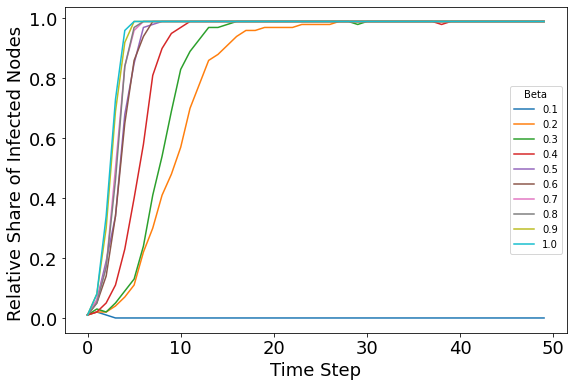

In [6]:
BA = nx.barabasi_albert_graph(100,2)
BA0 = initialize_graph(BA, 'state')
BA0_new = nx.set_node_attributes(BA0, name = 'recover',values =0)

plt.figure(figsize=(9,6))
for beta in np.linspace(.1,1,10):
    plt.plot(simulate_SIS_epidemic(BA0,50,beta,'state'),label=round(beta,1))
plt.legend(title='Beta')
plt.ylabel('Relative Share of Infected Nodes ',size=18)
plt.xlabel('Time Step',size=18)
plt.xticks(size=18)
plt.yticks(size=18)

In [7]:
attr = 'state'
ER = nx.erdos_renyi_graph(100,4/99)
ER0 = initialize_graph(ER,attr)
ER0_new = nx.set_node_attributes(ER0, name = 'recover',values =0)



(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

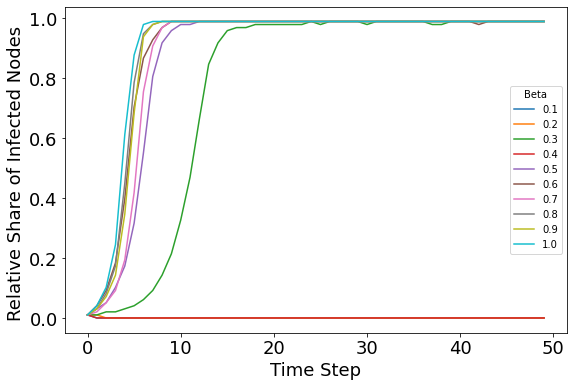

In [8]:
plt.figure(figsize=(9,6))
for beta in np.linspace(.1,1,10):
    plt.plot(simulate_SIS_epidemic(ER0,50,beta,'state'),label=round(beta,1))
plt.legend(title='Beta')
plt.ylabel('Relative Share of Infected Nodes ',size=18)
plt.xlabel('Time Step',size=18)
plt.xticks(size=18)
plt.yticks(size=18)

### Task 2:  Temporal Network Analysis (75 pts)

In [9]:
from networkx.algorithms import community
from community import community_louvain

In [17]:
G = nx.read_edgelist("out.opsahl-ucsocial", create_using = nx.MultiDiGraph(), 
                     nodetype = int, comments = "%", data = [("weight",int),("time",int)])

In [18]:
print(nx.info(G))

MultiDiGraph with 1899 nodes and 59835 edges


In [28]:
subgraph_Apr = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1082008561) \
                     and (e["time"] < 1083362400))

subgraph_May = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1083362400) \
                     and (e["time"] < 1086040800))

subgraph_ju = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1086040800) \
                     and (e["time"] < 1088632800))

subgraph_jl = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1088632800) \
                     and (e["time"] < 1091311200))

subgraph_au = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1091311200) \
                     and (e["time"] < 1093989600))

subgraph_se = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1093989600) \
                     and (e["time"] < 1096581600))

subgraph_oc = nx.MultiDiGraph((u,v,e) for u,v,e in G.edges(data=True) if (e["time"] >= 1096581600) \
                     and (e["time"] <= 1098744742))


In [29]:
r_A = nx.reciprocity(subgraph_Apr)
r_M = nx.reciprocity(subgraph_May)
r_JU = nx.reciprocity(subgraph_ju)
r_JL = nx.reciprocity(subgraph_jl)
r_AU = nx.reciprocity(subgraph_au)
r_S = nx.reciprocity(subgraph_se)
r_O = nx.reciprocity(subgraph_oc)

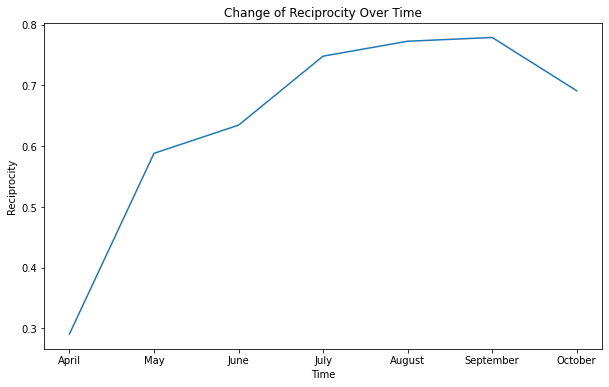

In [32]:
X = ['April',"May","June","July","August","September","October" ]
Y = [r_A,r_M, r_JU, r_JL, r_AU, r_S, r_O]

plt.figure(figsize = (10,6))
plt.plot(X, Y)
plt.title('Change of Reciprocity Over Time')
plt.xlabel('Time')
plt.ylabel('Reciprocity')
plt.show()